In [129]:
## Rice forecasting and prediction:
# Data Loading
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Rice.csv'
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [130]:
df.head()
df

,Year,Area,Production,Yield,Area under Irrigation(%)
0,1951-52,29.83,21.30,714,31.71
1,1952-53,29.97,22.90,764,32.3
2,1953-54,31.29,28.21,902,33.59
3,1954-55,30.77,25.22,820,34.41
4,1955-56,31.52,27.56,874,34.88
...,...,...,...,...,...
62,2013-14,44.14,106.65,2416,59.65
63,2014-15,44.11,105.48,2391,60.09
64,2015-16,43.50,104.41,2400,-
65,2016-17,43.99,109.70,2494,-


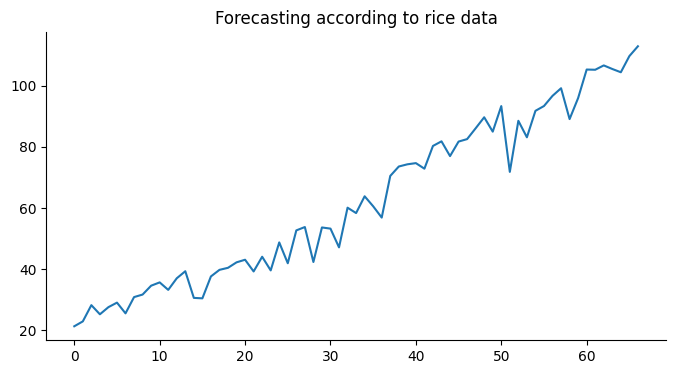

In [131]:
# Production

from matplotlib import pyplot as plt
df['Production'].plot(kind='line', figsize=(8, 4), title='Forecasting according to rice data')
plt.gca().spines[['top', 'right']].set_visible(False)

In [132]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np

In [133]:
# Keep only production column
df = df[['Production']]

In [134]:
# Convert to float
df['Production'] = df['Production'].astype(float)

<ipython-input-134-9cb8324ec63d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Production'] = df['Production'].astype(float)


In [135]:
# Scale the data
scaler = MinMaxScaler()
df['Production'] = scaler.fit_transform(df[['Production']])

<ipython-input-135-7e51136ee59a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Production'] = scaler.fit_transform(df[['Production']])


In [136]:
# Split data into train and test
train = df.loc[:'2010-11']
test = df.loc['2011-12':]

In [137]:
# Reshape for LSTM
X_train = train.values.reshape(-1,1)
X_test = test.values.reshape(-1,1)

In [138]:
# Build LSTM model
model = Sequential()
model.add(LSTM(80, activation='relu', input_shape=(1, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [139]:
# Train model
model.fit(X_train, X_train, epochs=800, batch_size=1, verbose=0)


In [140]:
# Predict on test
pred = model.predict(X_test)
pred = scaler.inverse_transform(pred)

2/2 [==============================] - 0s 8ms/step


In [141]:
# Evaluate model
mae = mean_absolute_error(test, pred)
print("MAE:", mae)

MAE: 73.9452603438371


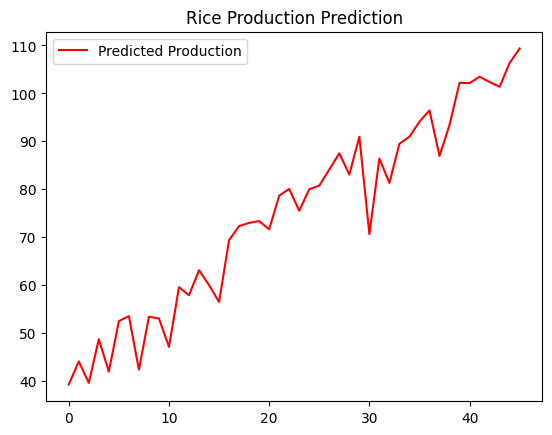

In [142]:
# Plot results
plt.plot(pred, color='red', label='Predicted Production')
plt.title('Rice Production Prediction')
plt.legend()
plt.show()

In [143]:
# Predict next 30 years
X_new = test.values[-30:].reshape(-1,1)
next_30_years = model.predict(X_new)
next_30_years = scaler.inverse_transform(next_30_years)
print(next_30_years)

1/1 [==============================] - 0s 22ms/step
[[ 69.37769 ]
 [ 72.285515]
 [ 72.964935]
 [ 73.332954]
 [ 71.61552 ]
 [ 78.635635]
 [ 80.0602  ]
 [ 75.503204]
 [ 79.98473 ]
 [ 80.74888 ]
 [ 84.08826 ]
 [ 87.4838  ]
 [ 83.05064 ]
 [ 90.93328 ]
 [ 70.63356 ]
 [ 86.399155]
 [ 81.30548 ]
 [ 89.47279 ]
 [ 90.952126]
 [ 94.08955 ]
 [ 96.435295]
 [ 86.92732 ]
 [ 93.42064 ]
 [102.19982 ]
 [102.13389 ]
 [103.47123 ]
 [102.36935 ]
 [101.361595]
 [106.34341 ]
 [109.36589 ]]


In [144]:
# Fit curve
x = np.arange(0, len(df))
y = df['Production'].values
p = np.polyfit(x, y, 4)
f = np.poly1d(p)

In [145]:
print(f) # Print equation

            4             3             2
-1.148e-08 x - 1.014e-06 x + 0.0002617 x + 0.004356 x + 0.04133


In [148]:
# Define the polynomial coefficients
a = -1.148e-08
b = - 1.014e-06
c = 0.0002617
d = 0.004356
e = 0.04133
# Profit calculation:
C= 1000     # for eg. taking cost price per production

# Evaluate the polynomial at certain value of x
x_val = 82.07022
polynomial_value = a * pow(x_val,4) + b * pow(x_val,3) + c * pow(x_val,2) + d * x_val + e
print("Polynomial value at x =", x_val, "is", polynomial_value)
print(C*polynomial_value) # profit eg

Polynomial value at x = 82.07022 is 1.0801730830662053
1080.1730830662052


In [149]:
# Data Loading
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Wheat.csv'
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [151]:
# Keep production column
df = df[['Production']]

# Convert to float
df['Production'] = df['Production'].astype(float)


<ipython-input-151-6252ce2f56da>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Production'] = df['Production'].astype(float)


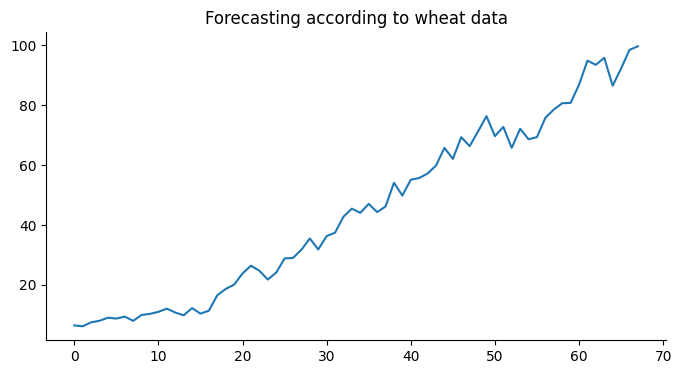

In [152]:
# Production

from matplotlib import pyplot as plt
df['Production'].plot(kind='line', figsize=(8, 4), title='Forecasting according to wheat data')
plt.gca().spines[['top', 'right']].set_visible(False)

In [153]:
# Scale data
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)

In [154]:
# Split data into train and test
train = df.loc[:'2010-11']
test = df.loc['2011-12':]

In [155]:
# Reshape for LSTM
X_train = train.values.reshape(-1,1)
X_test = test.values.reshape(-1,1)

In [156]:
# Build LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, 1)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

In [157]:
# Train model
model.fit(X_train, X_train, epochs=200, batch_size=1, verbose=0)


In [158]:
# Predict and rescale
pred = model.predict(X_test)
pred = scaler.inverse_transform(pred)

2/2 [==============================] - 0s 5ms/step


In [159]:
# Evaluate model
mae = mean_absolute_error(test, pred)
print("MAE:", mae)

MAE: 5501.4996839677515


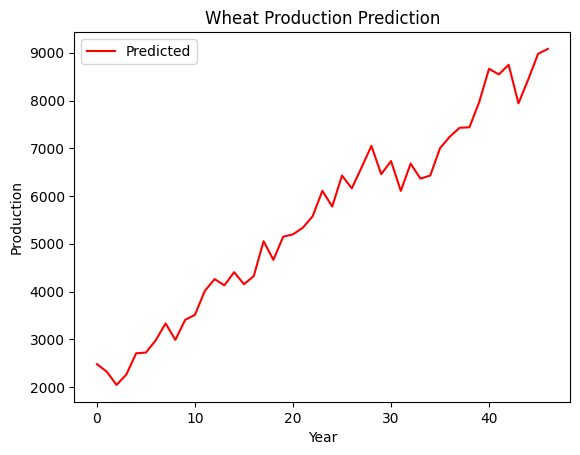

In [160]:
# Plot results
plt.plot(pred, color='red', label='Predicted')
plt.title('Wheat Production Prediction')
plt.xlabel('Year')
plt.ylabel('Production')
plt.legend()
plt.show()


In [161]:
# Prediction on 2024-2051 time frame
X_future = np.arange(2024,2051).reshape(-1,1)
X_future_poly = poly.fit_transform(X_future)
future_pred = model.predict(X_future_poly)
print(future_pred)


1/1 [==============================] - 0s 189ms/step
[[1.5649093e+13]
 [1.5680043e+13]
 [1.5711037e+13]
 [1.5742078e+13]
 [1.5773165e+13]
 [1.5804295e+13]
 [1.5835473e+13]
 [1.5866699e+13]
 [1.5897968e+13]
 [1.5929285e+13]
 [1.5960648e+13]
 [1.5992058e+13]
 [1.6023513e+13]
 [1.6055015e+13]
 [1.6086563e+13]
 [1.6118159e+13]
 [1.6149800e+13]
 [1.6181486e+13]
 [1.6213219e+13]
 [1.6245003e+13]
 [1.6276831e+13]
 [1.6308706e+13]
 [1.6340627e+13]
 [1.6372596e+13]
 [1.6404610e+13]
 [1.6436672e+13]
 [1.6468781e+13]]


In [165]:
# Fit curve
x = np.arange(0, len(df))
y = df['Production'].values
p = np.polyfit(x, y, 2)
f = np.poly1d(p)

In [166]:
print(f) # Print equation

          2
0.007956 x + 0.9395 x + 1.586


In [168]:
# Define the polynomial coefficients
a = 0.007956
b = 0.9395
c = 1.586
# Profit calculation:
C= 1000     # for eg. taking cost price per production

# Evaluate the polynomial at certain value of x
x_val = 1.9178593e+13
polynomial_value = a * pow(x_val,2) + b * x_val + c
print("Polynomial value at x =", x_val, "is", polynomial_value)
print(C*polynomial_value) # profit eg

Polynomial value at x = 19178593000000.0 is 2.9263634247989856e+24
2.926363424798986e+27
